Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Import the dataset 

In [2]:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:,1:-1].values
Y = dataset.iloc[:,-1].values

In [3]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(Y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


we have to apply feature scaling in this position because over here it is not compensating for the other values which are taking a higher values

so we have to first normalize it and then do support vector regression

Apply feature scaling to levels and salary

In [5]:
# first reshape the Y from 1d array to 2d array
# for standerdization

Y = Y.reshape((len(Y),1))
print(Y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [6]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X = sc_X.fit_transform(X)

sc_Y = StandardScaler()
Y = sc_Y.fit_transform(Y)

In [7]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [8]:
print(Y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


Training the data on whole dataset

In [10]:
from sklearn.svm import SVR

regressor = SVR(kernel = "rbf")
regressor.fit(X,Y)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Predict a new result

In [11]:
sc_Y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1)) 
# we will reverse the scaling because we gave a scaling for Y as well
# reshape is for not getting format error

array([[170370.0204065]])

Visualize the SVR results 

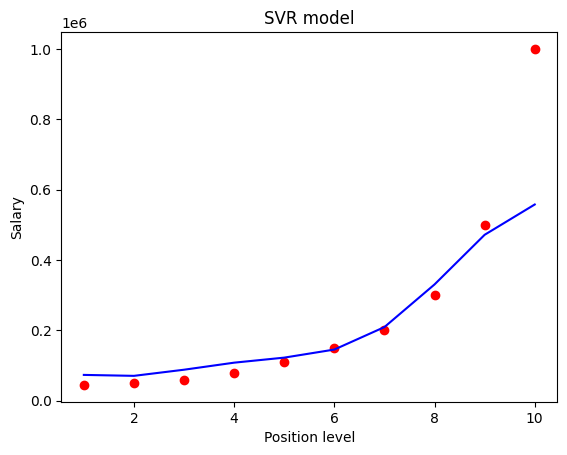

In [13]:
plt.scatter(sc_X.inverse_transform(X),sc_Y.inverse_transform(Y),color = "red")
plt.plot(sc_X.inverse_transform(X),sc_Y.inverse_transform(regressor.predict(X).reshape(-1,1)),color="blue")
plt.title("SVR model")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

Visualizing the SVR model in higher resolution and more smoother curves

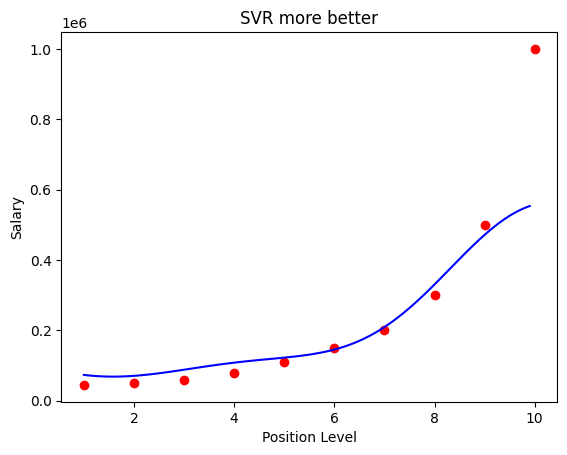

In [14]:
X_grid = np.arange(min(sc_X.inverse_transform(X)),max(sc_X.inverse_transform(X)),0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(sc_X.inverse_transform(X),sc_Y.inverse_transform(Y),color="red")
plt.plot(X_grid,sc_Y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)),color="blue")
plt.title("SVR more better")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()